In [1]:
import numpy as np
import mne # docu: https://mne.tools/stable/overview/index.html
import pandas as pd
import matplotlib.pyplot as plt
import glob
import mne_connectivity as mne_connect
from autoreject import get_rejection_threshold
from mne.preprocessing import EOGRegression

# https://neuraldatascience.io/7-eeg/mne_data.html
%matplotlib widget

=================================== 1 ===================================
267 events found
Event IDs: [4]
Using matplotlib as 2D backend.


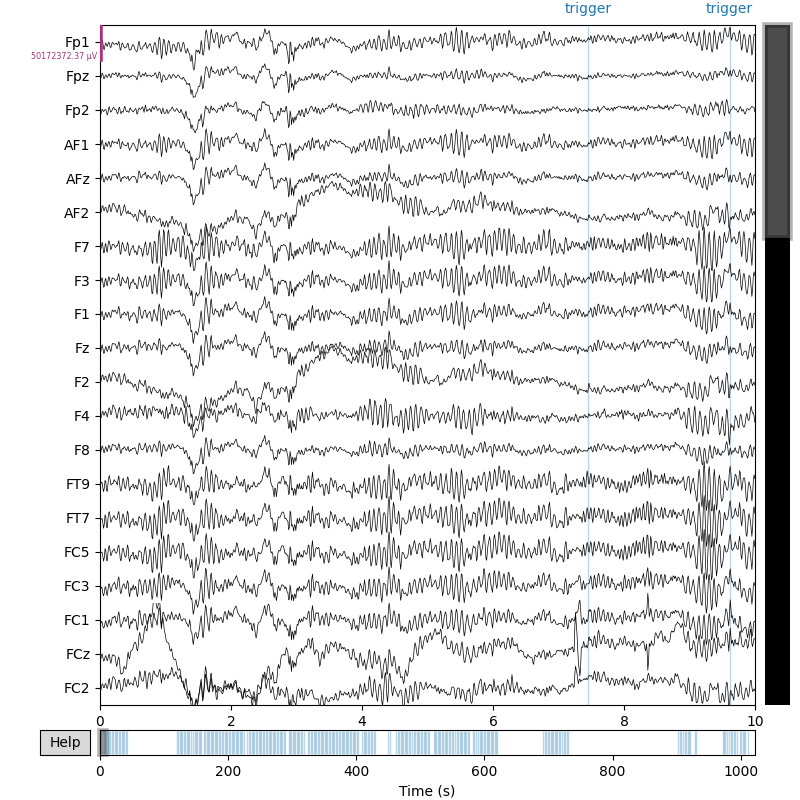

Not setting metadata
267 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 267 events and 1741 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


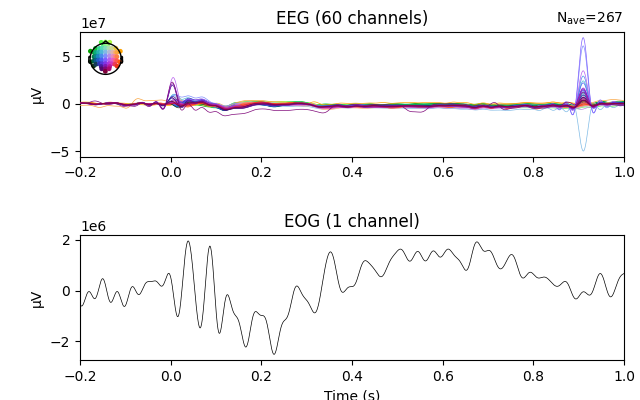

=================================== 2 ===================================
224 events found
Event IDs: [4]
2 events found
Event IDs: [4]


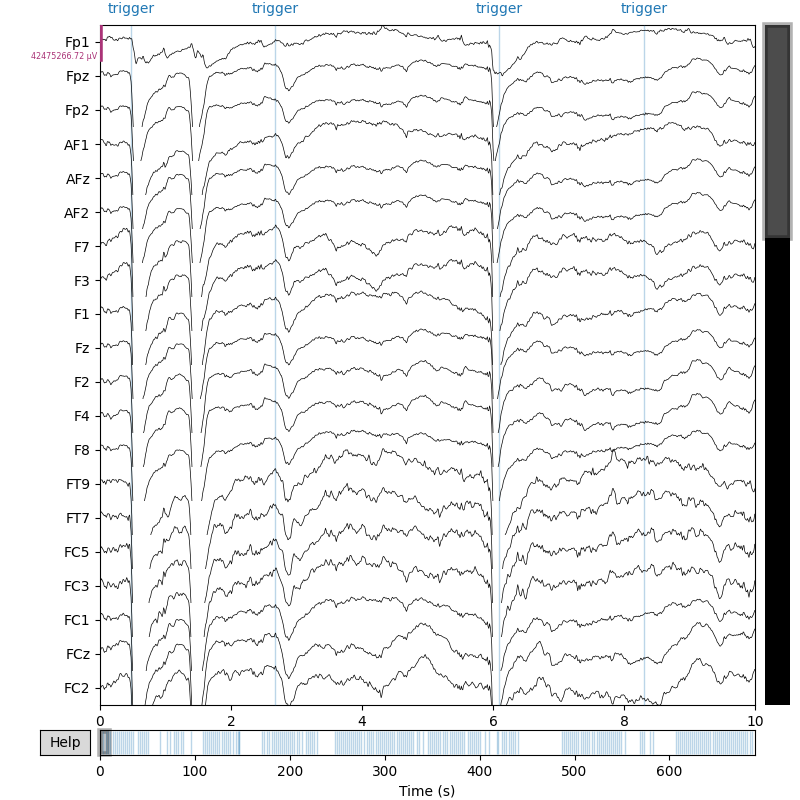

Not setting metadata
226 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 226 events and 1741 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


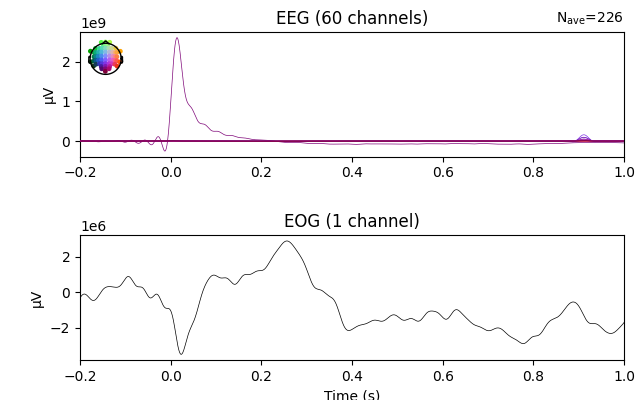

=================================== 3 ===================================
272 events found
Event IDs: [4]


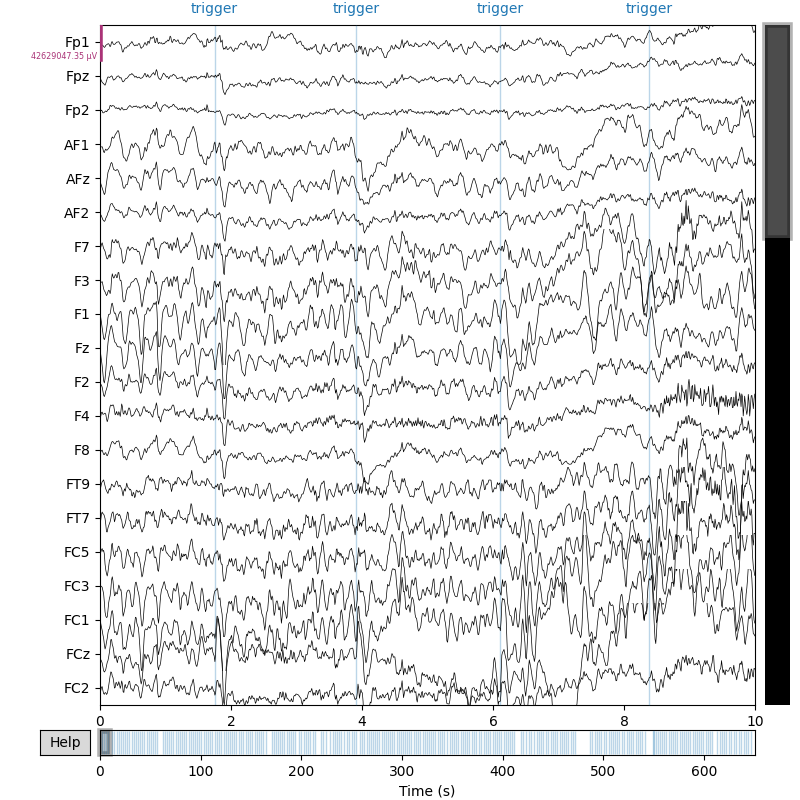

Not setting metadata
272 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 272 events and 1741 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


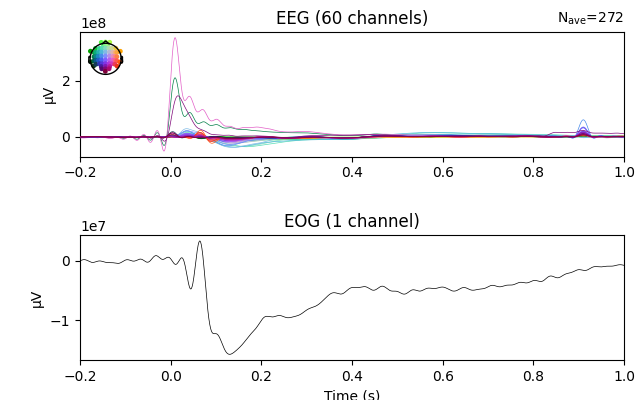

=================================== 4 ===================================
359 events found
Event IDs: [4]


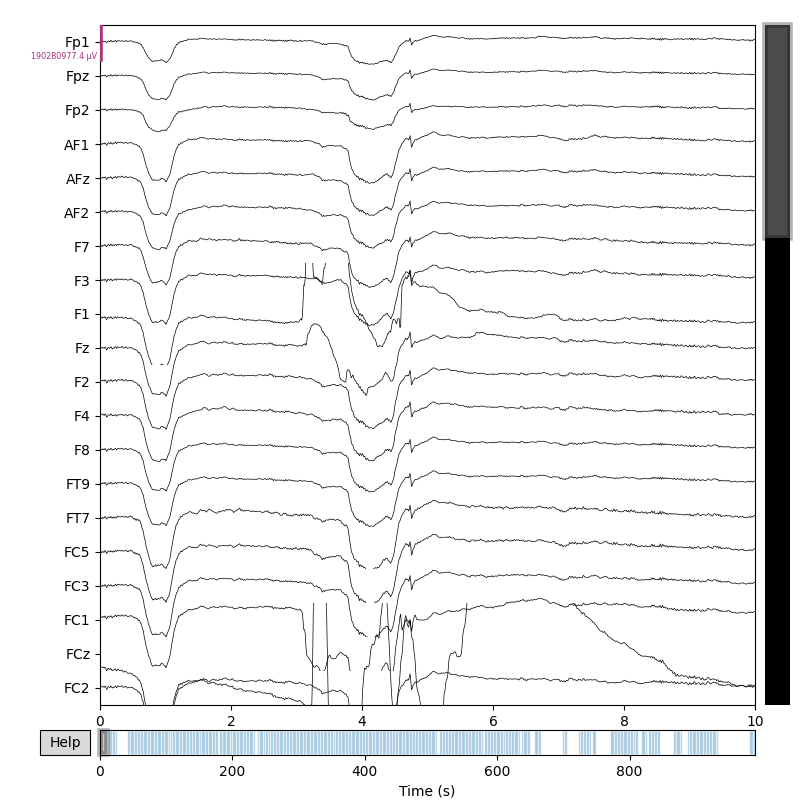

Not setting metadata
359 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 359 events and 1741 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


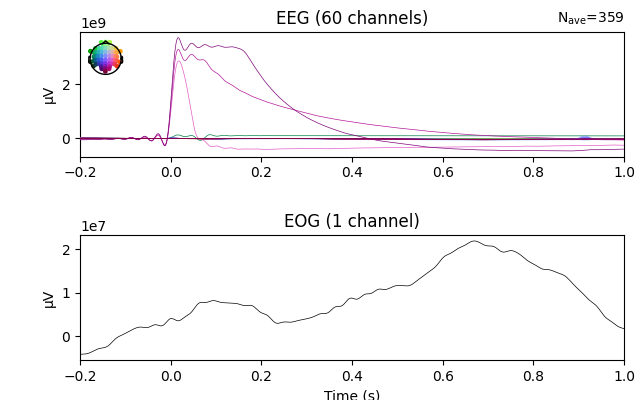

=================================== 5 ===================================
331 events found
Event IDs: [4]


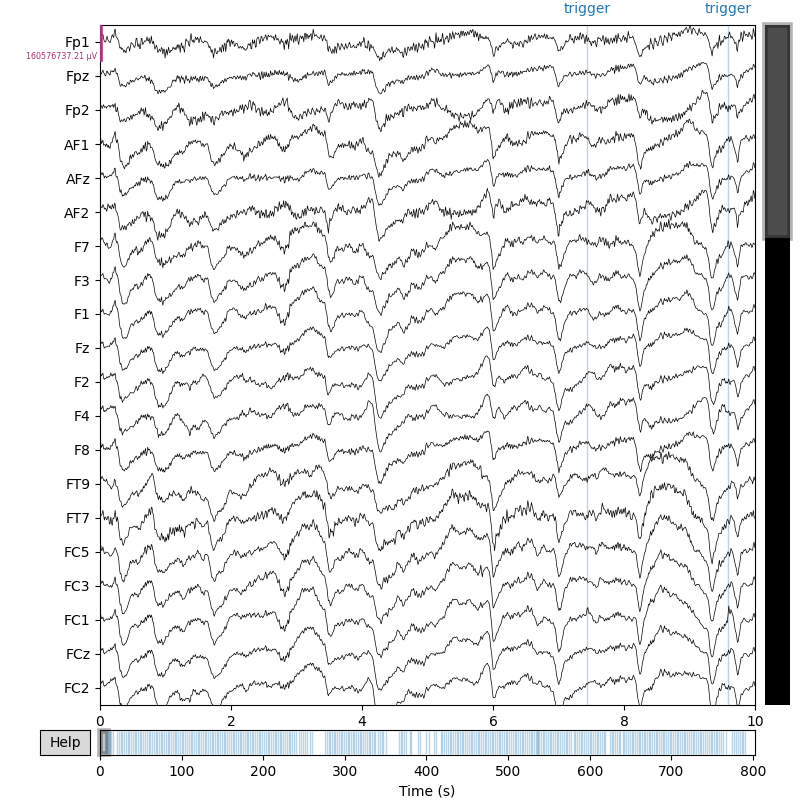

Not setting metadata
331 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 331 events and 1741 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


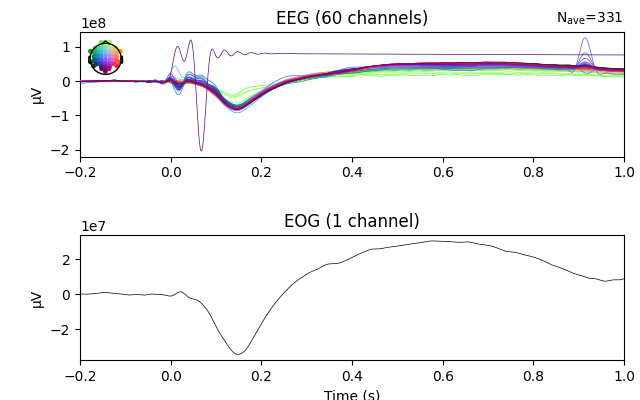

In [2]:
# Filtering settings
low_cut = 0.1
hi_cut  = 30

# Epoching settings
tmin =  -.200  # start of each epoch (in sec)
tmax =  1.000  # end of each epoch (in sec)
baseline = (None, 0)

for i in range(1,6):
    print(f"=================================== {i} ===================================")

    raw = mne.io.read_raw_eximia(f"../data_ukazka/sub-S0{i}/sub-S0{i}.nxe", preload=True, verbose=False)
    raw.set_montage('standard_1005')
    raw_filtered = raw.filter(low_cut, hi_cut,picks=['eeg','eog'],verbose=False);
    events = mne.find_events(raw_filtered, stim_channel=["GateIn","Trig1","Trig2"],min_duration = 2 / raw_filtered.info['sfreq'])


    annot_from_events = mne.annotations_from_events(
        events=events,
        event_desc={4: "trigger"},
        sfreq=raw_filtered.info["sfreq"],
        orig_time=raw_filtered.info["meas_date"],
    )
    raw_filtered.set_annotations(annot_from_events)

    raw_filtered.plot(scalings='auto');

    # Create epochs
    events, event_dict = mne.events_from_annotations(raw_filtered,verbose=False);
    epochs = mne.Epochs(raw_filtered,
                        events, event_dict,
                        tmin, tmax,
                        baseline=baseline, 
                        preload=True);
    
    epochs.average("all").plot()
    